# Computational Social Science Project #3 

**Enter your Name:** Neena Albarus

**Collaboration Team** Marisa Tsai, Stacy Chen, Reiley Reed, Sofia Guo

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [14]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [15]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [16]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [17]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [18]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [19]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

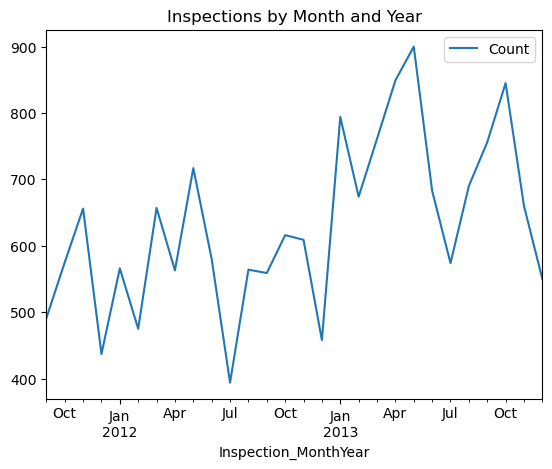

In [20]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

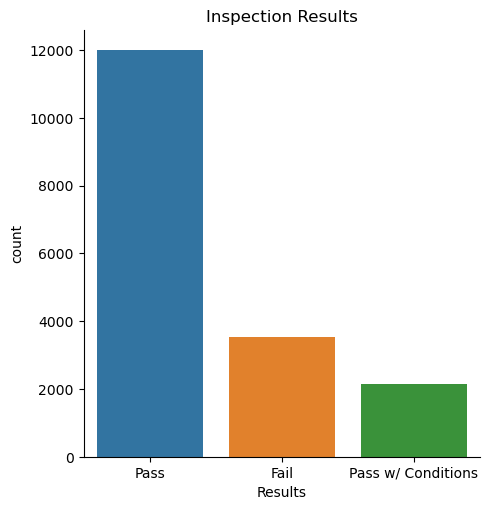

In [21]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

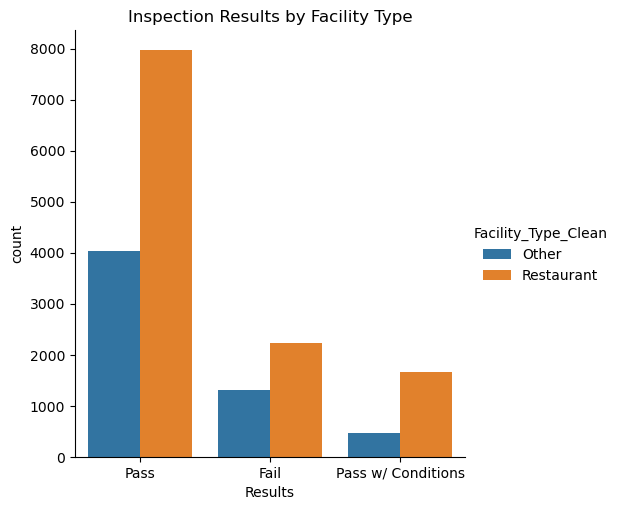

In [22]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [23]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [24]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])

# get dummies
X = pd.get_dummies(X)

In [25]:
# view feature datset
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

In [26]:
#proportion of fails
y.sum()/len(y)

0.20161975050617204

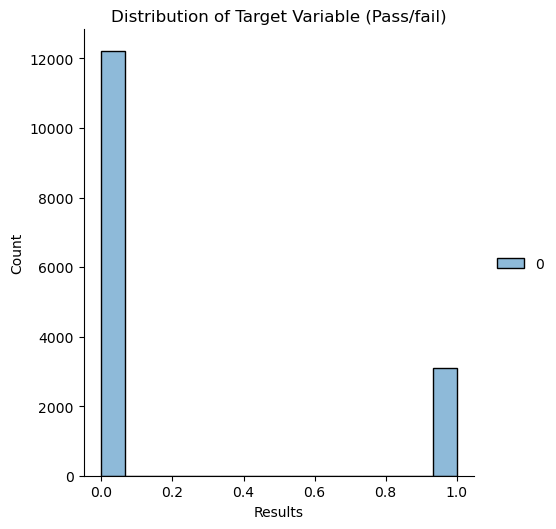

In [27]:
# distribution plot of the outcome variable
sns.displot(y)    # notice the default is a histogram
plt.title("Distribution of Target Variable (Pass/fail)")
plt.xlabel('Results')
plt.ylabel('Count')
plt.show()

There is an imbalance in our data where there are around 80% passes and 20% fails, which could be a problem because a model would over predict the majority class more often.

In [30]:
#!pip install scikit-learn

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split

In [32]:
#split our data into test/train
# Set seed
np.random.seed(10)

# training and test split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = .80, 
                                                    test_size=0.20,
                                                    stratify=y)

# training and validation split 
X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            train_size = .75, 
                                                            test_size = .25, 
                                                            stratify = y_train)

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1

In [33]:
#logistic regression

# load libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


In [34]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

# predict on the validation data
y_pred = logit_model.predict(X_validate)


In [35]:
# extract the coefficents and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

In [36]:
# extract the coefficents and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

In [40]:
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9157413455258001


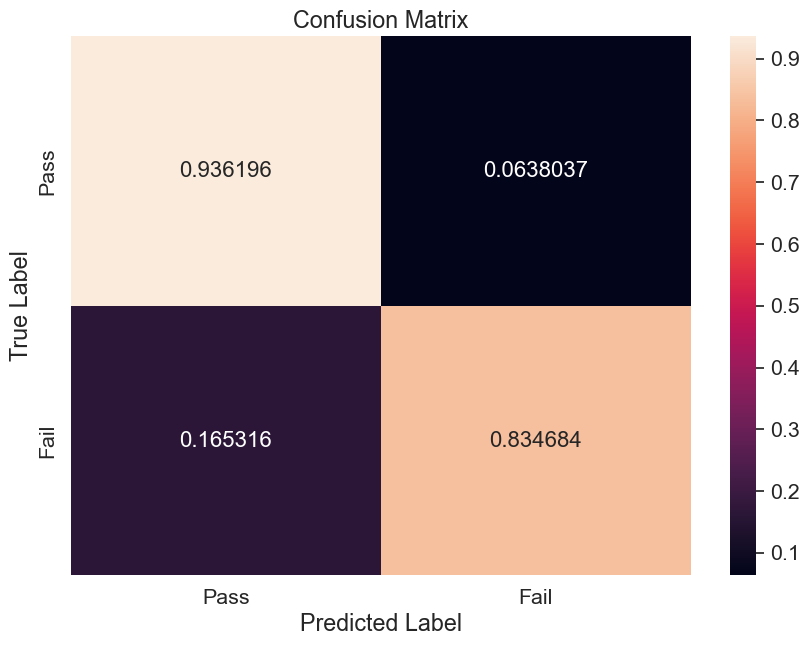

In [41]:
# specify confusion matrix
cf_matrix = confusion_matrix(y_validate, 
                             best_logit_pred, 
                             normalize = "true")

# convert to dataframe
df_cm = pd.DataFrame(cf_matrix, 
                     range(2),
                     range(2))

# label dataframe 
df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]

# plot
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [42]:
# set each object to 0 to start
TP = 0
FP = 0
TN = 0
FN = 0

# loop over each observation to assign to TP, FP, TN, and FN
for i in range(len(y_pred)): 
    if y_validate[i]==y_pred[i]==1:
        TP += 1
    if y_pred[i]==1 and y_validate[i]==0:
        FP += 1
    if y_validate[i]==y_pred[i]==0:
        TN += 1
    if y_pred[i]==0 and y_pred[i]!=y_validate[i]:
        FN += 1

In [43]:
# calculate accuracy based on the formula defined above
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)

# calculate precision based on the formula defined above
precision = TP/(TP + FP)
print("Precision is", precision)

# calculate recall based on the formula defined above
recall = TP/(TP + FN)
print("Recall is", recall)

# calculate the F1 score based on the formula defined above
f1 = 2 * (precision * recall)/(precision + recall)
print("F1 Score is", f1)

Accuracy is 0.9134552580013063
Precision is 0.7521489971346705
Recall is 0.8508914100486223
F1 Score is 0.7984790874524715


### Merit of Logistic Regression Model

Logic: In the context of food inspection, this model proves advantageous in discerning whether a site passes or fails inspection. This lies in establishing a relationship between input features and the probability of a specific outcome. 

Pros: Proficient in predicting binary responses, particularly when coded as 0 or 1.  

Cons: With disparity in the distribution of pass and fail instances, the model may development of incorrect weights.

Reasoning: Despite its limitations, logistic regression serves as an apt starting point for this classification problem due to its ability to handle binary outcomes 

###  Model 2

In [44]:
#!pip install xgboost

import xgboost as xgb

In [45]:
# Define the XGBoost classifier

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=10)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(xgb_classifier, X, y.ravel(), cv=5, return_estimator=True, scoring=scoring)

# Print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.918
recall: 0.835
precision: 0.777
f1: 0.805


### Merit of XGBoost

Logic: It employs a gradient boosting framework, optimizing the loss function at each iteration, which makes it highly efficient and effective.

Pros: XGBoost is optimized for performance and efficiency, making it faster than traditional boosting methods.It also includes regularisation terms in the objective function, which helps prevent overfitting

Cons: The range of hyperparameters can make it more complex and require more computational resources than some simpler models. 

Reasoning: XGBoost provides a feature importance score, allowing for a better understanding of which features contribute more significantly to the inspection outcomes. This can be valuable for identifying critical factors in food inspection.

### Model 3

In [46]:
#adaptive boosting
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

%matplotlib inline
sns.set_style("darkgrid")

# initialize an adaptive boosting classifer 
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)

In [47]:
# calculate accuracy using cross validation
# ----------
scores = cross_val_score(ada_classifier,  # specify classifier
                         X,               # specify features
                         y.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

In [48]:
# calculate mean score across models 
# ----------
scores.mean()

0.9143099419058043

In [49]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, f1_score


# Initialize AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=100)

# Create a dictionary to store the scoring metrics
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
cv_results = cross_validate(ada_classifier, X, y.ravel(), cv=5, scoring=scoring_metrics)

# Calculate mean scores across models for each metric
mean_accuracy = cv_results['test_accuracy'].mean()
mean_precision = cv_results['test_precision'].mean()
mean_recall = cv_results['test_recall'].mean()
mean_f1 = cv_results['test_f1'].mean()

# Print the results
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Mean Precision: {mean_precision:.4f}')
print(f'Mean Recall: {mean_recall:.4f}')
print(f'Mean F1 Score: {mean_f1:.4f}')


Mean Accuracy: 0.9143
Mean Precision: 0.7718
Mean Recall: 0.8180
Mean F1 Score: 0.7932


## Merit of AdaBoost

Logic: AdaBoost increases the weight of cases with higher error to improve their prediction. Due to the increased weight on incorrect cases, the new model prioritises getting those cases correct.

Pros: Helps understand model accuracy differences across a hyperparameter; often better prediction than random forest.

Cons: Prone to overfitting because of the focus on higher error; not as efficient as using GridSearchCV

Reasoning: AdaBoost enhances prediction accuracy by focusing on cases with higher error. While it may be prone to overfitting, its performance is anticipated to surpass other models. In the context of food inspection, where there might be variations in the number of passing and failing instances, Adaboost's ability to assign higher weights to misclassified instances can be beneficial.


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [50]:
#scores = cross_val_score(xgb_classifier, X, y, cv=5)
from sklearn.metrics import make_scorer

models = {
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(),
    'XGB': xgb.XGBClassifier()
}

# Define the metrics as scorers
scorers = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# Perform cross-validation and calculate metrics for each model
for model_name, model in models.items():
    print(f"\n{model_name}:\n")
    
    # Perform cross-validation for each metric
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(model, X, y, cv=5, scoring=scorer)
        avg_score = scores.mean()
        print(f"{metric_name}: {avg_score:.4f}")


AdaBoost:

Accuracy: 0.9154
Precision: 0.7768
Recall: 0.8180
F1: 0.7955

Logistic Regression:

Accuracy: 0.9182
Precision: 0.7785
Recall: 0.8371
F1: 0.8049

XGB:

Accuracy: 0.9182
Precision: 0.7774
Recall: 0.8348
F1: 0.8046


## Explain results

Logistic Regression seems to perform slightly better overall, with the highest precision, recall, and F1 score.

XGBoost performs very similarly to Logistic Regression, with only slight differences in precision, recall, and F1 score.

AdaBoost has slightly lower precision, recall, and F1 score compared to Logistic Regression and XGBoost.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

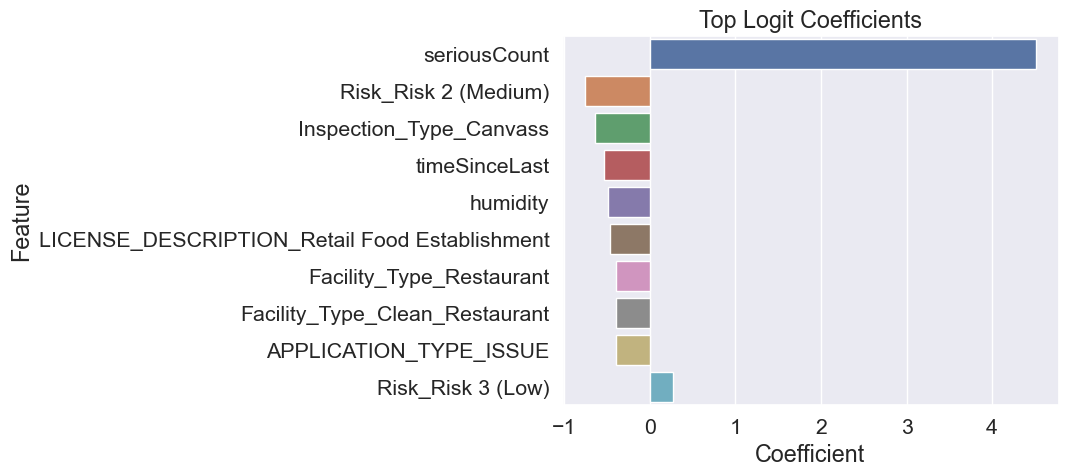

In [51]:
# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()


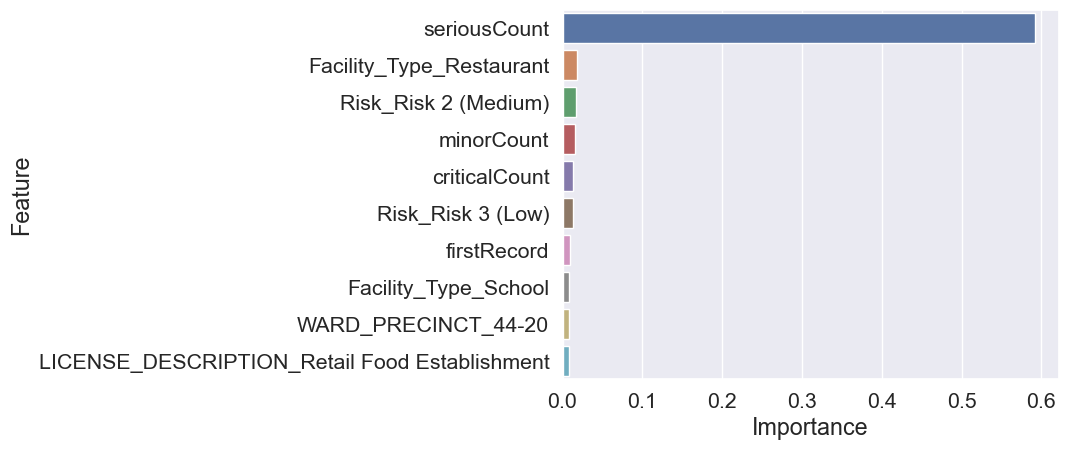

In [61]:
# import libraries
import seaborn as sns
import numpy as np
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# instantiate the XGBClassifier
model = xgb.XGBClassifier()

# fit the model on the data
model.fit(X, y.ravel())

# create feature importance dataframe
feat_importances = pd.DataFrame(list(zip(X.columns, model.feature_importances_)), columns=["Feature", "Importance"])

# plot 
sns.barplot(x="Importance", y="Feature", data=feat_importances.nlargest(10, 'Importance'))
plt.show()



### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [59]:
import os
import pandas

In [69]:
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
# Import the XGBClassifier
from xgboost import XGBClassifier

# Create an instance of XGBClassifier
xgb_model = XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Now you can use the trained model for predictions
proba_predictions = xgb_model.predict_proba(X_test)


In [70]:
proba_predictions 

#the first number in each row is the probability of a 0=Pass prediction;
# the second number is the probability of a 1=Fail prediction

array([[9.9988574e-01, 1.1428900e-04],
       [8.2756221e-02, 9.1724378e-01],
       [9.9984872e-01, 1.5126851e-04],
       ...,
       [9.9736023e-01, 2.6397752e-03],
       [9.9983412e-01, 1.6585112e-04],
       [4.9916607e-01, 5.0083393e-01]], dtype=float32)

In [71]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
# Get the probabilities for class 1 (second column)
class_1_probabilities = proba_predictions[:, 1]

# Sort the indices based on the probabilities of class 1 in descending order
sorted_indices = np.argsort(class_1_probabilities)[::-1]

# Sort the proba_predictions array based on sorted indices
sorted_proba_predictions = proba_predictions[sorted_indices]

sorted_proba_predictions

array([[1.0454655e-04, 9.9989545e-01],
       [2.2786856e-04, 9.9977213e-01],
       [2.4408102e-04, 9.9975592e-01],
       ...,
       [9.9999630e-01, 3.6865931e-06],
       [9.9999756e-01, 2.4540379e-06],
       [9.9999875e-01, 1.2286429e-06]], dtype=float32)

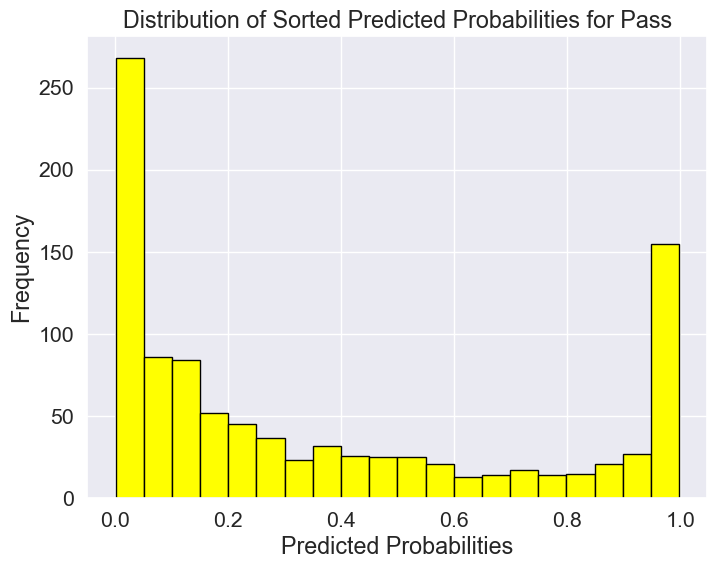

In [74]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
# get the first 1,000 observations (indices 0 to 999)
num_observations = 1000
probabilities = sorted_proba_predictions[:num_observations, 0]  # Probabilities for Pass

# Plotting the distribution of sorted predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(probabilities, bins=20, color='yellow', edgecolor='black')
plt.title('Distribution of Sorted Predicted Probabilities for Pass')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

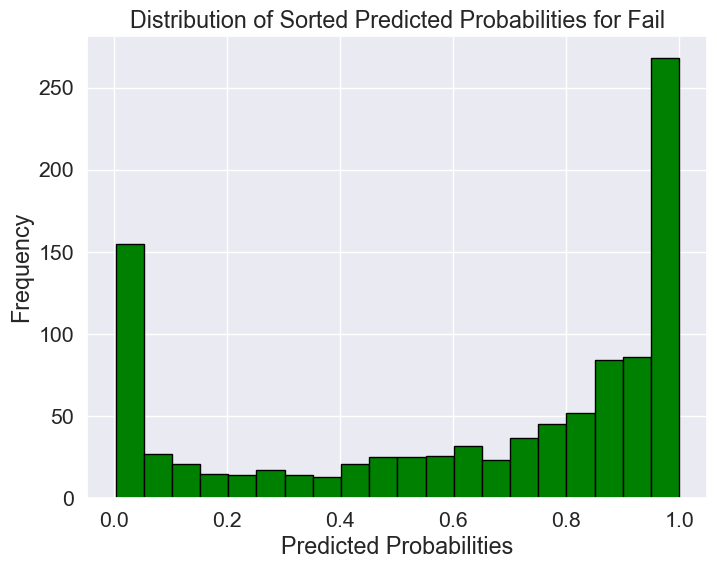

In [75]:
probabilities_1 = sorted_proba_predictions[:num_observations, 1]  # Probabilities for Fail

# Plotting the distribution of sorted predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(probabilities_1, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Sorted Predicted Probabilities for Fail')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [76]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

# Get the total number of observations in your dataset
total_observations = chicago_inspections_2011_to_2013.shape[0]

# Set the number of observations to audit (1000 in this case)
num_observations_to_audit = 1000

# Randomly select 1000 rows from the dataset without replacement
subset_data = chicago_inspections_2011_to_2013.sample(n=num_observations_to_audit, replace=False)

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [77]:
# data processing

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)



In [78]:
relevant_cols = subset_data.columns #get the columns that are present in chicago_inspections_2011_2013

In [79]:
#select the columns that are relevant for the 2014 dataset
X_full = chicago_inspections_2014[['Facility_Type', 'Risk', 'Inspection_Type', 'Results',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'APPLICATION_TYPE', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound']]

In [80]:
# drop missing vals
X14 = X_full.dropna()


# -----------
y14 = X14['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y14 = y14.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y14 = lb_style.fit_transform(y14)

# recode 0s and 1s so 1s are "Fail"
y14 = np.where(y14 == 1, 0 ,1)


# process features
# -----------

# process features
X_test2014 = X14
X_test2014 = pd.get_dummies(X14)      

# process target 
y_test2014 = y14


In [89]:
# predict and compare 
# -----------
# predict and compare using already trained xgb_classifier
# -----------
rf14_pred = xgb_model.fit(X_test2014, y_test2014)

# Using predict_proba() to predict probabilities for test data
proba_predictions_14 = xgb_model.predict_proba(X_test2014)

In [90]:
proba_predictions_14

array([[9.9971527e-01, 2.8471550e-04],
       [9.9971527e-01, 2.8471550e-04],
       [1.1577010e-03, 9.9884230e-01],
       ...,
       [9.9971527e-01, 2.8471550e-04],
       [9.9971527e-01, 2.8471550e-04],
       [9.9971527e-01, 2.8471550e-04]], dtype=float32)

In [95]:
from sklearn.model_selection import cross_val_score

# calculate accuracy using cross validation
# ----------
scores14 = cross_val_score(xgb_model,  # specify classifier
                         X_test2014,               # specify features
                         y_test2014.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

In [96]:
scores14 #not sure why it is 100% accurate...

array([1., 1., 1., 1., 1.])

In [97]:
# evaluate
# -----------
#Validate the models: 
    
models = {
    'XGB': xgb.XGBClassifier(),
}

# Define the metrics as scorers
scorers = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# Perform cross-validation and calculate metrics for each model
for model_name, model in models.items():
    print(f"\n{model_name}:\n")
    
    # Perform cross-validation for each metric
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(model, X_test2014, y_test2014, cv=5, scoring=scorer)
        avg_score = scores.mean()
        print(f"{metric_name}: {avg_score:.4f}")


XGB:

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**YOUR ANSWER HERE**...Accuracy alone doesn't show biases or ethical concerns, so metrics for fairness, transparency, and long-term impact are necessary to uncover hidden issues. 

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**...Policymakers can use strategies such as randomisation in auditing processes, a diverse set of metrics, and regularly training their models to deter the effects of behaviour change. 